### Disney recommendation modelling

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Disney+, along with details such as - show_id, type, title, country, cast, date_added, directors, ratings, release year and duration.


**Dataset Info -** The Dataset contains 1,535 rows and 15 columns, 1 ID Column and others described below.

- **id**: The title ID on JustWatch
- **title**: The name of the title
- **show_type**: TV show or movie
- **description**: A brief description
- **release_year**: The release year
- **age_certification**: The age certification
- **runtime**: The length of the episode (SHOW) or movie
- **genres**: A list of genres
- **production_countries**: A list of countries that produced the title
- **seasons**: Number of seasons if it's a SHOW
- **imdb_id**: The title ID on IMDB
- **imdb_score**: Score on IMDB
- **imdb_votes**: Votes on IMDB
- **tmdb_popularity**: Popularity on TMDB
- **tmdb_score**: Score on TMDB


- **Goal**
The goal of this project is to develop a recommendation system for Disney Plus, enhancing user experience by efficiently helping them discover new shows and movies of their interest. Currently, users may struggle to find content that matches their personal preferences due to the extensive library available. An effective recommendation system can not only increase user engagement but also improve overall satisfaction by facilitating personalized discovery of relevant content.

- **ML Problem Statement**
The associated ML problem is to develop a recommendation model capable of analyzing the viewing history and preferences of Disney Plus users to predict and recommend new shows and movies they are likely to enjoy. This is a collaborative filtering-based item recommendation problem aimed at delivering accurate and relevant recommendations to enhance user discovery experience on the streaming service.

## Importing the libraries :

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import lets_plot as lp

## Loading the dataset :

In [31]:
file_path = r'C:\Users\Bianca\Documents\GitHub\disney_recommendation\titles.csv'
disney_plus = pd.read_csv(file_path)

In [32]:
disney_plus.head(3) # Exibe as primeiras 3 linhas por padrão

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1


In [33]:
disney_plus.shape # Retorna uma tupla (número de linhas, número de colunas)

(1535, 15)

In [34]:
disney_plus.dtypes  # Retorna os tipos de dados de cada coluna

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [35]:
disney_plus.nunique() # Retorna o número de valores únicos em cada coluna

id                      1535
title                   1500
type                       2
description             1528
release_year              91
age_certification          9
runtime                  157
genres                   621
production_countries      70
seasons                   15
imdb_id                 1133
imdb_score                66
imdb_votes              1003
tmdb_popularity         1445
tmdb_score                62
dtype: int64

In [36]:
disney_plus.isnull().sum() # Finding Missing Values

id                         0
title                      0
type                       0
description                6
release_year               0
age_certification        325
runtime                    0
genres                     0
production_countries       0
seasons                 1120
imdb_id                  402
imdb_score               427
imdb_votes               430
tmdb_popularity           11
tmdb_score               109
dtype: int64

In [37]:
print(disney_plus.isnull().sum())

id                         0
title                      0
type                       0
description                6
release_year               0
age_certification        325
runtime                    0
genres                     0
production_countries       0
seasons                 1120
imdb_id                  402
imdb_score               427
imdb_votes               430
tmdb_popularity           11
tmdb_score               109
dtype: int64


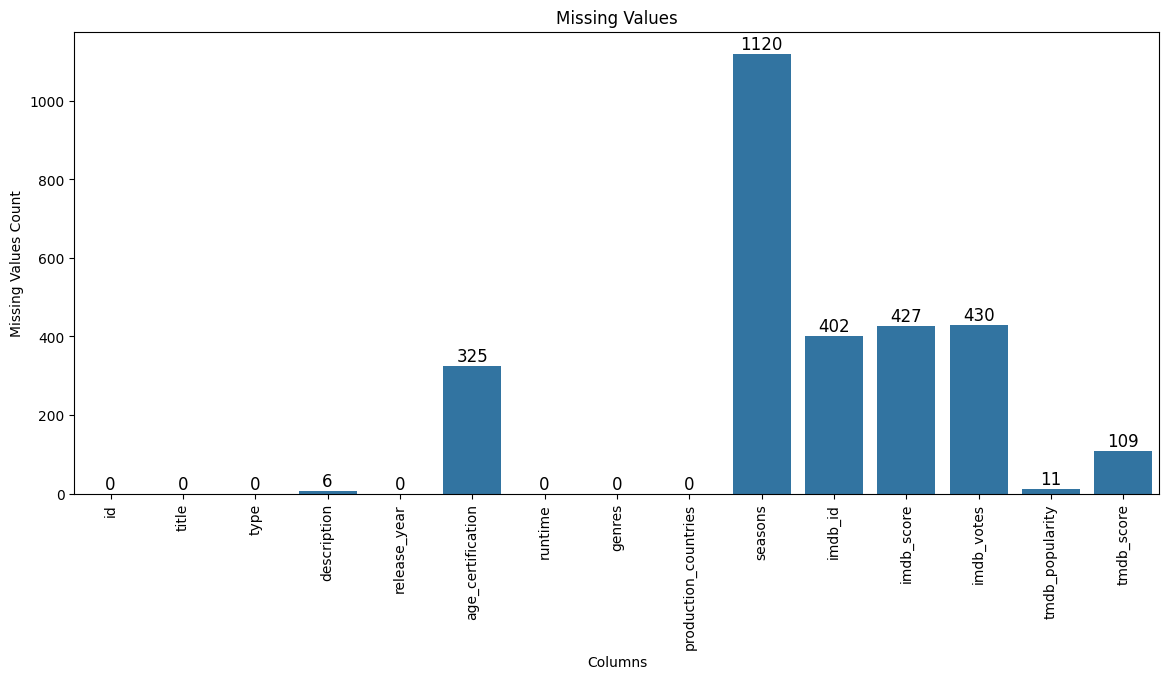

In [40]:
missing_values_count = disney_plus.isnull().sum()

# Configura o tamanho da figura
plt.figure(figsize=(14, 6))

# Cria o gráfico de barras
sns.barplot(x=missing_values_count.index, y=missing_values_count)

# Adiciona título ao gráfico
plt.title("Missing Values")

# Configurações adicionais para o eixo x, eixo y e rotação dos rótulos no eixo x
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)

# Adiciona os valores numéricos acima das barras
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
            int(height), fontsize=12, ha='center', va='bottom')

# Exibe o gráfico
plt.show()
